<a href="https://colab.research.google.com/github/NolanRink/CS4001/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip
!pip install --quiet allensdk neuron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 131.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 118.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 135.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.1/973.1 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [2]:
import math
import matplotlib.pyplot as plt
from allensdk.api.queries.biophysical_api import BiophysicalApi
from allensdk.model.biophys_sim.config import Config
from allensdk.model.biophysical.utils import Utils
import ipywidgets as widgets
from IPython.display import display

# User provides Specimen, Input Resistance, and Cell ID

In [3]:
specimen_id = int(input("Enter the specimen ID: "))
desired_R_in = float(input("Enter the desired input resistance (in MOhm): "))
bp = BiophysicalApi()
x = bp.get_neuronal_models(int(specimen_id))
cell_ids = [i['id'] for i in x]

cell_id_dropdown = widgets.Dropdown(
    options=cell_ids,
    description='Cell ID:'
)

# Display the dropdown
display(cell_id_dropdown)

cell_id = cell_id_dropdown.value

Enter the specimen ID: 486132712
Enter the desired input resistance (in MOhm): 0.1


Dropdown(description='Cell ID:', options=(488083972, 515175260), value=488083972)

In [4]:
cell_id = cell_id_dropdown.value
print('Selected cell ID:', cell_id)

Selected cell ID: 488083972


In [5]:
bp.cache_stimulus = False
print(f"Downloading cell data for cell ID {cell_id}...")
bp.cache_data(int(cell_id))
print("Download complete.")

2025-02-28 22:04:50,861 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328536
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328536
2025-02-28 22:04:50,957 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328544
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328544
2025-02-28 22:04:51,011 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
2025-02-28 22:04:51,059 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_fi

Download complete.


In [6]:
!nrnivmodl modfiles

description = Config().load('manifest.json')
utils = Utils(description)
h = utils.h

# Convert all "value" attributes to floats
for dict in utils.description.data['genome']:
    for key, value in dict.items():
        if key == 'value': dict[key] = float(value)

/usr/local/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/content
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/SK.mod"

Creating 'x86_64' directory for .o files.

 -> NMODL ../modfiles/CaDynamics.mod
 -> NMODL ../modfiles/Ca_HVA.mod
 -> Compiling mod_func.cpp
 -> NMODL ../modfiles/Ca_LVA.mod
Translating CaDynamics.mod into /content/x86_64/CaDynamics.c
Thread Safe
Translating Ca_HVA.mod into /content/x86_64/Ca_HVA.c
 -> NMODL ../modfiles/Ih.

In [16]:
manifest = description.manifest
morphology_path = manifest.get_path('MORPHOLOGY')
utils.generate_morphology(morphology_path.encode('ascii', 'ignore'))

# Set default passive properties
passive = {
    "ra": 100,
    "cm": [
        {"section": "soma", "cm": 1},
        {"section": "axon", "cm": 1},
        {"section": "dend", "cm": 1},
        {"section": "apic", "cm": 1}
    ],
    "e_pas": -65.75
}
utils.description.data["passive"][0] = passive

utils.load_cell_parameters()

In [17]:
print(utils.description.data)

{'biophys': [{'model_file': ['manifest.json', 'fit_486132712_f9.json'], 'model_type': 'Biophysical - perisomatic'}], 'runs': [{'sweeps': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 70, 71, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]}], 'neuron': [{'hoc': ['stdgui.hoc', 'import3d.hoc']}], 'passive': [{'ra': 100, 'cm': [{'section': 'soma', 'cm': 1}, {'section': 'axon', 'cm': 1}, {'section': 'dend', 'cm': 1}, {'section': 'apic', 'cm': 1}], 'e_pas': -65.75}], 'fitting': [{'junction_potential': -14.0, 'sweeps': [56, 57, 58, 59]}], 'conditions': [{'celsius': 34.0, 'erev': [{'ena': 53.0, 'section': 'soma', 'ek': -107.0}], 'v_init': -82.34514617919922}], 'genome': [{'section': 'soma', 'name': 'gbar_Im', 'value': 3.5831046068113176e-07, 'mechani

In [18]:
soma_area = 0.0
for sec in h.soma:
    # Approximate surface area for a cylinder: area = π * diameter * length
    soma_area += math.pi * sec.diam * sec.L
print(f"Estimated soma area: {soma_area:.2f} µm²")

Estimated soma area: 318.93 µm²


In [19]:
new_gbar_leak = (1 / desired_R_in) / soma_area
print(f"Updating g-bar-leak to {new_gbar_leak:.5f} (units depend on model specifics)")
utils.description.data["passive"][0]["gbar_leak"] = new_gbar_leak
utils.load_cell_parameters()

Updating g-bar-leak to 0.03136 (units depend on model specifics)


In [20]:
# Set up a negative current injection at the soma
stim = h.IClamp(h.soma[0](0.5))
stim.amp = -0.1
stim.delay = 100.0
stim.dur = 800.0
h.tstop = 1000.0

# Record voltage data using provided utility
vec = utils.record_values()

In [21]:
# Initialize and run the simulation
h.finitialize()
h.run()

0.0

In [22]:
# Convert recorded vectors to NumPy arrays for analysis
t = vec['t'].as_numpy()
v = vec['v'].as_numpy()

# Estimate resting voltage (average before current injection, t < 100 ms)
V_rest = v[t < 100].mean()

In [23]:
# Find the minimum voltage during the injection period (100 ms <= t <= 900 ms)
injection_indices = (t >= 100) & (t <= 900)
V_trough = v[injection_indices].min()

# Compute the estimated input resistance
R_in_estimated = (V_rest - V_trough) / 0.1


Estimated input resistance from simulation: 153.26 MOhm


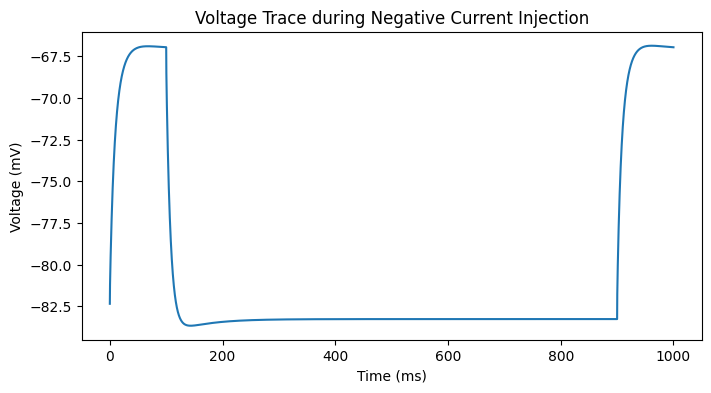

In [24]:
print(f"\nEstimated input resistance from simulation: {R_in_estimated:.2f} MOhm")

plt.figure(figsize=(8, 4))
plt.plot(t, v)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.title("Voltage Trace during Negative Current Injection")
plt.show()